In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.decomposition import PCA

DATA_PATH = './data/'


In [23]:
corpus = []
file_list = []

for i in range(1000):
    file_list.append('News_' + str(i + 1) + '_C.txt')

for file_name in file_list:
    file_path = DATA_PATH + file_name
    file = open(file_path, encoding='utf-8')
    corpus.append(file.read())

In [18]:
# 分词向量化
vectorizer = CountVectorizer()
word_vec = vectorizer.fit_transform(corpus)

In [19]:
#提取TF-IDF词向量
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(word_vec)
tfidf_matrix = tfidf.toarray()  #对应tfidf矩阵

In [20]:
#压缩 Feature
pca = PCA(n_components=3)
tfidf_matrix = pca.fit_transform(tfidf_matrix)

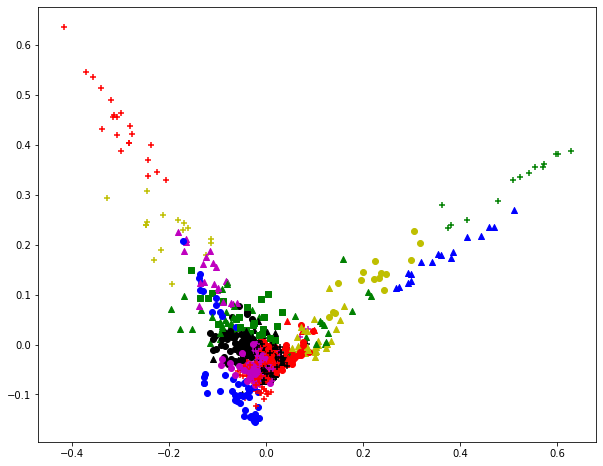

In [21]:
# K-Means

km_cluster = KMeans(n_clusters=20, max_iter=300, n_init=2,
                    init='random', verbose=False)

# 返回各自文本的所被分配到的类索引
labels = km_cluster.fit_predict(tfidf_matrix)

markers = ['^', '^', '^', '^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', 'o', '+', '+', '+', '+', '+', '+', 's', 's']
colors = ['r', 'g', 'b', 'm', 'k', 'y', 'g', 'r', 'b', 'm', 'k', 'y', 'b', 'g', 'r', 'm', 'k', 'y', 'r', 'g' ]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(labels)):
    plt.scatter(tfidf_matrix[i, 0], tfidf_matrix[i, 1], c=colors[labels[i]], marker=markers[labels[i]])
fig.savefig('./kMeans.png', transparent=False, dpi=600, bbox_inches="tight")


[16 10 16  9  4 10 15  0 16 15 16 13  0 16  7  0  0 18  0 15  9 19  0 16
  9 15 10  7  5 15  9 18 15 10  7 14  0 15 12 10  0 10  7 18  9 15 17 18
  1 16  8 11  0 15 15 15 15 15  7 12 10  9  3 18  7 18 10 15 11  0  0  1
 10 15 10 10 12  9 10 15 15 15  0 18 16 18  0 17 18 15 10  6  0 15  0  9
 12 15  0 10 16  0  5 15  6  5 10  7 16  9  6 18  5 16  2  7  0  4 18 16
  0 19  3 18 12  0  0 16  9 18 13  2 15 16 18  0 18 18 15 15 15 15 10  1
 16  0  3 10  6 16  0 16 15  6 15 16 16  0  4  6  9 10 18  0  9  9  7 16
  9  9  5 18 10 15 18 16  3  1 11 15 16  2  9 16 16  7 18 17  7 16  9  9
  0 12  0 15  1 19 10  7  8  0  7 15 10 16 16 18 11 16  7 10 15 18 17 16
 15 15 15  9 18 10 16  9 16  9  0 18 18 12 18  0 11  4  0 10  7  1 14 15
 10  0 10 18 15 11  0 17 16 15  2 15 18  4 10  7  2  0 15  9 15  0 15 18
 15  9  7 18 16  0 14  7  8  9  7 18 16  7 16 16 16 16 16 10 12  0  7 10
  0  1  8 10 19  1  1 12 15  9  4  7 10  0 16 18  6 16  4  7  0  9  0 12
  9 16  5  1  9  5  0 10 10 18 16  5 18 17 17 16 15

<ipython-input-22-af7fda2b37dd>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


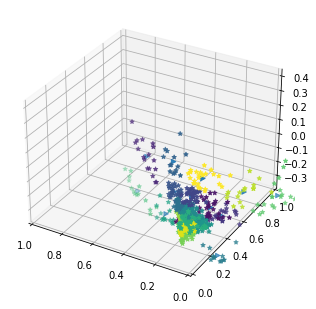

In [22]:
# 三维可视化
label_pred = km_cluster.labels_  # 获取聚类标签

centroids = km_cluster.cluster_centers_  # 获取聚类中心

print(label_pred)
print(centroids)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tfidf_matrix[:, 0], tfidf_matrix[:, 1], tfidf_matrix[:, 2], c=labels, marker='*')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='>')
plt.axis([1, 0, 0, 1])
plt.show()

